In [4]:
import pandas as pd
data = pd.read_csv(r"C:\Users\sreea\Downloads\stocks.csv")



In [12]:
data['Date'] = pd.to_datetime(data['Date'])


In [13]:
data.isnull().sum()


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
data.dtypes


Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [15]:
data.duplicated().sum()


0

In [16]:
print(data.shape)        
print(data['Ticker'].unique())  


(248, 8)
['AAPL' 'MSFT' 'NFLX' 'GOOG']


In [8]:
import pandas as pd
data = pd.read_csv(r"C:\Users\sreea\Downloads\stocks.csv")
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [9]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [10]:
data['Ticker'].unique()


array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [11]:
print(data.shape)
print(data.dtypes)


(248, 8)
Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


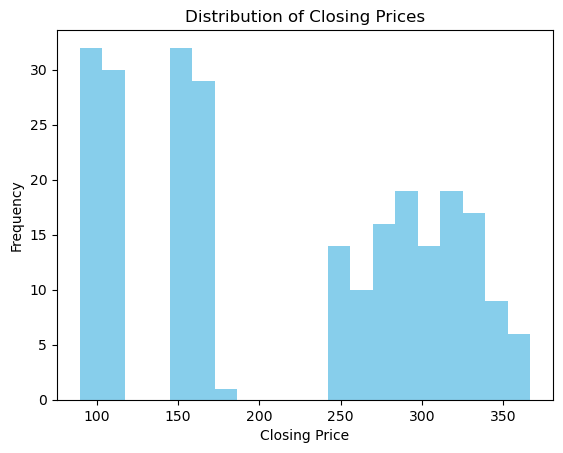

In [12]:
import matplotlib.pyplot as plt
plt.hist(data['Close'], bins=20, color='skyblue')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()


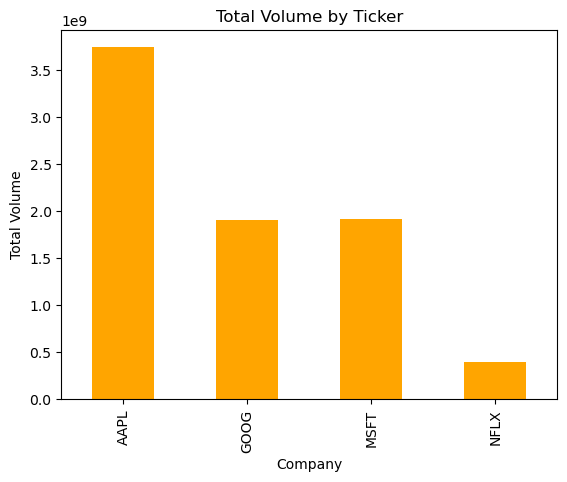

In [13]:
import seaborn as sns
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar', color='orange')
plt.xlabel('Company')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')
plt.show()


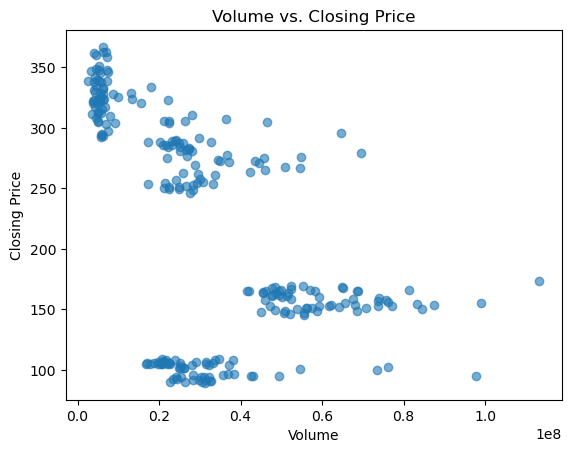

In [14]:
plt.scatter(data['Volume'], data['Close'], alpha=0.6)
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()


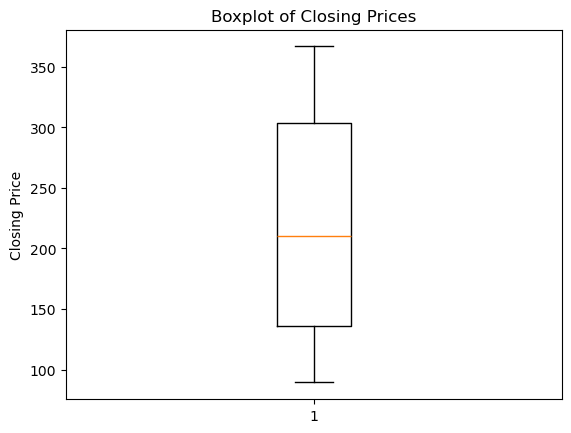

In [15]:
plt.boxplot(data['Close'])
plt.ylabel('Closing Price')
plt.title('Boxplot of Closing Prices')
plt.show()


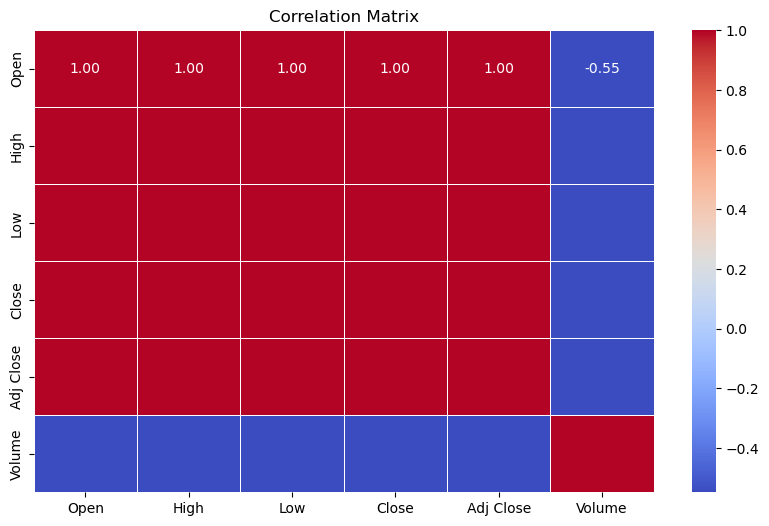

In [16]:
corr = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [17]:
data['MA7'] = data['Close'].rolling(window=7).mean()


In [18]:
data['MA30'] = data['Close'].rolling(window=30).mean()


In [19]:
data['Volatility'] = data['Close'].rolling(window=7).std()


In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.day_name()



In [22]:
data['Daily Return'] = data['Close'].pct_change()


In [23]:
data[['Date', 'Ticker', 'Close', 'MA7', 'MA30', 'Volatility', 'Daily Return']].head(10)


,Date,Ticker,Close,MA7,MA30,Volatility,Daily Return
0,2023-02-07,AAPL,154.649994,NaN,NaN,NaN,NaN
1,2023-02-08,AAPL,151.919998,NaN,NaN,NaN,-0.017653
2,2023-02-09,AAPL,150.869995,NaN,NaN,NaN,-0.006912
3,2023-02-10,AAPL,151.009995,NaN,NaN,NaN,0.000928
4,2023-02-13,AAPL,153.850006,NaN,NaN,NaN,0.018807
5,2023-02-14,AAPL,153.199997,NaN,NaN,NaN,-0.004225
6,2023-02-15,AAPL,155.330002,152.975712,NaN,1.759413,0.013903
7,2023-02-16,AAPL,153.710007,152.841428,NaN,1.642303,-0.010429
8,2023-02-17,AAPL,152.550003,152.931429,NaN,1.600112,-0.007547
9,2023-02-21,AAPL,148.479996,152.590001,NaN,2.240234,-0.026680


In [24]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = data[features]
y = data[target]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.4f}")


Mean Squared Error (MSE): 2.28
R-squared (R² Score): 0.9997


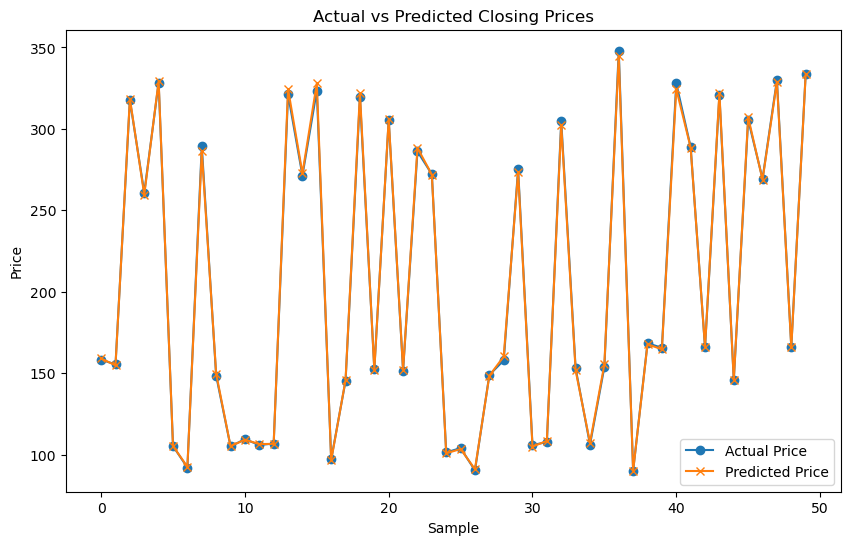

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(y_pred, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.show()
